In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [ ]:
model = ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000)

102973440/102967424 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model.output

NameError: ignored

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_shape=(224, 224, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
subModel = tf.keras.models.Model(inputs = baseModel.input, outputs = baseModel.layers[25].output)

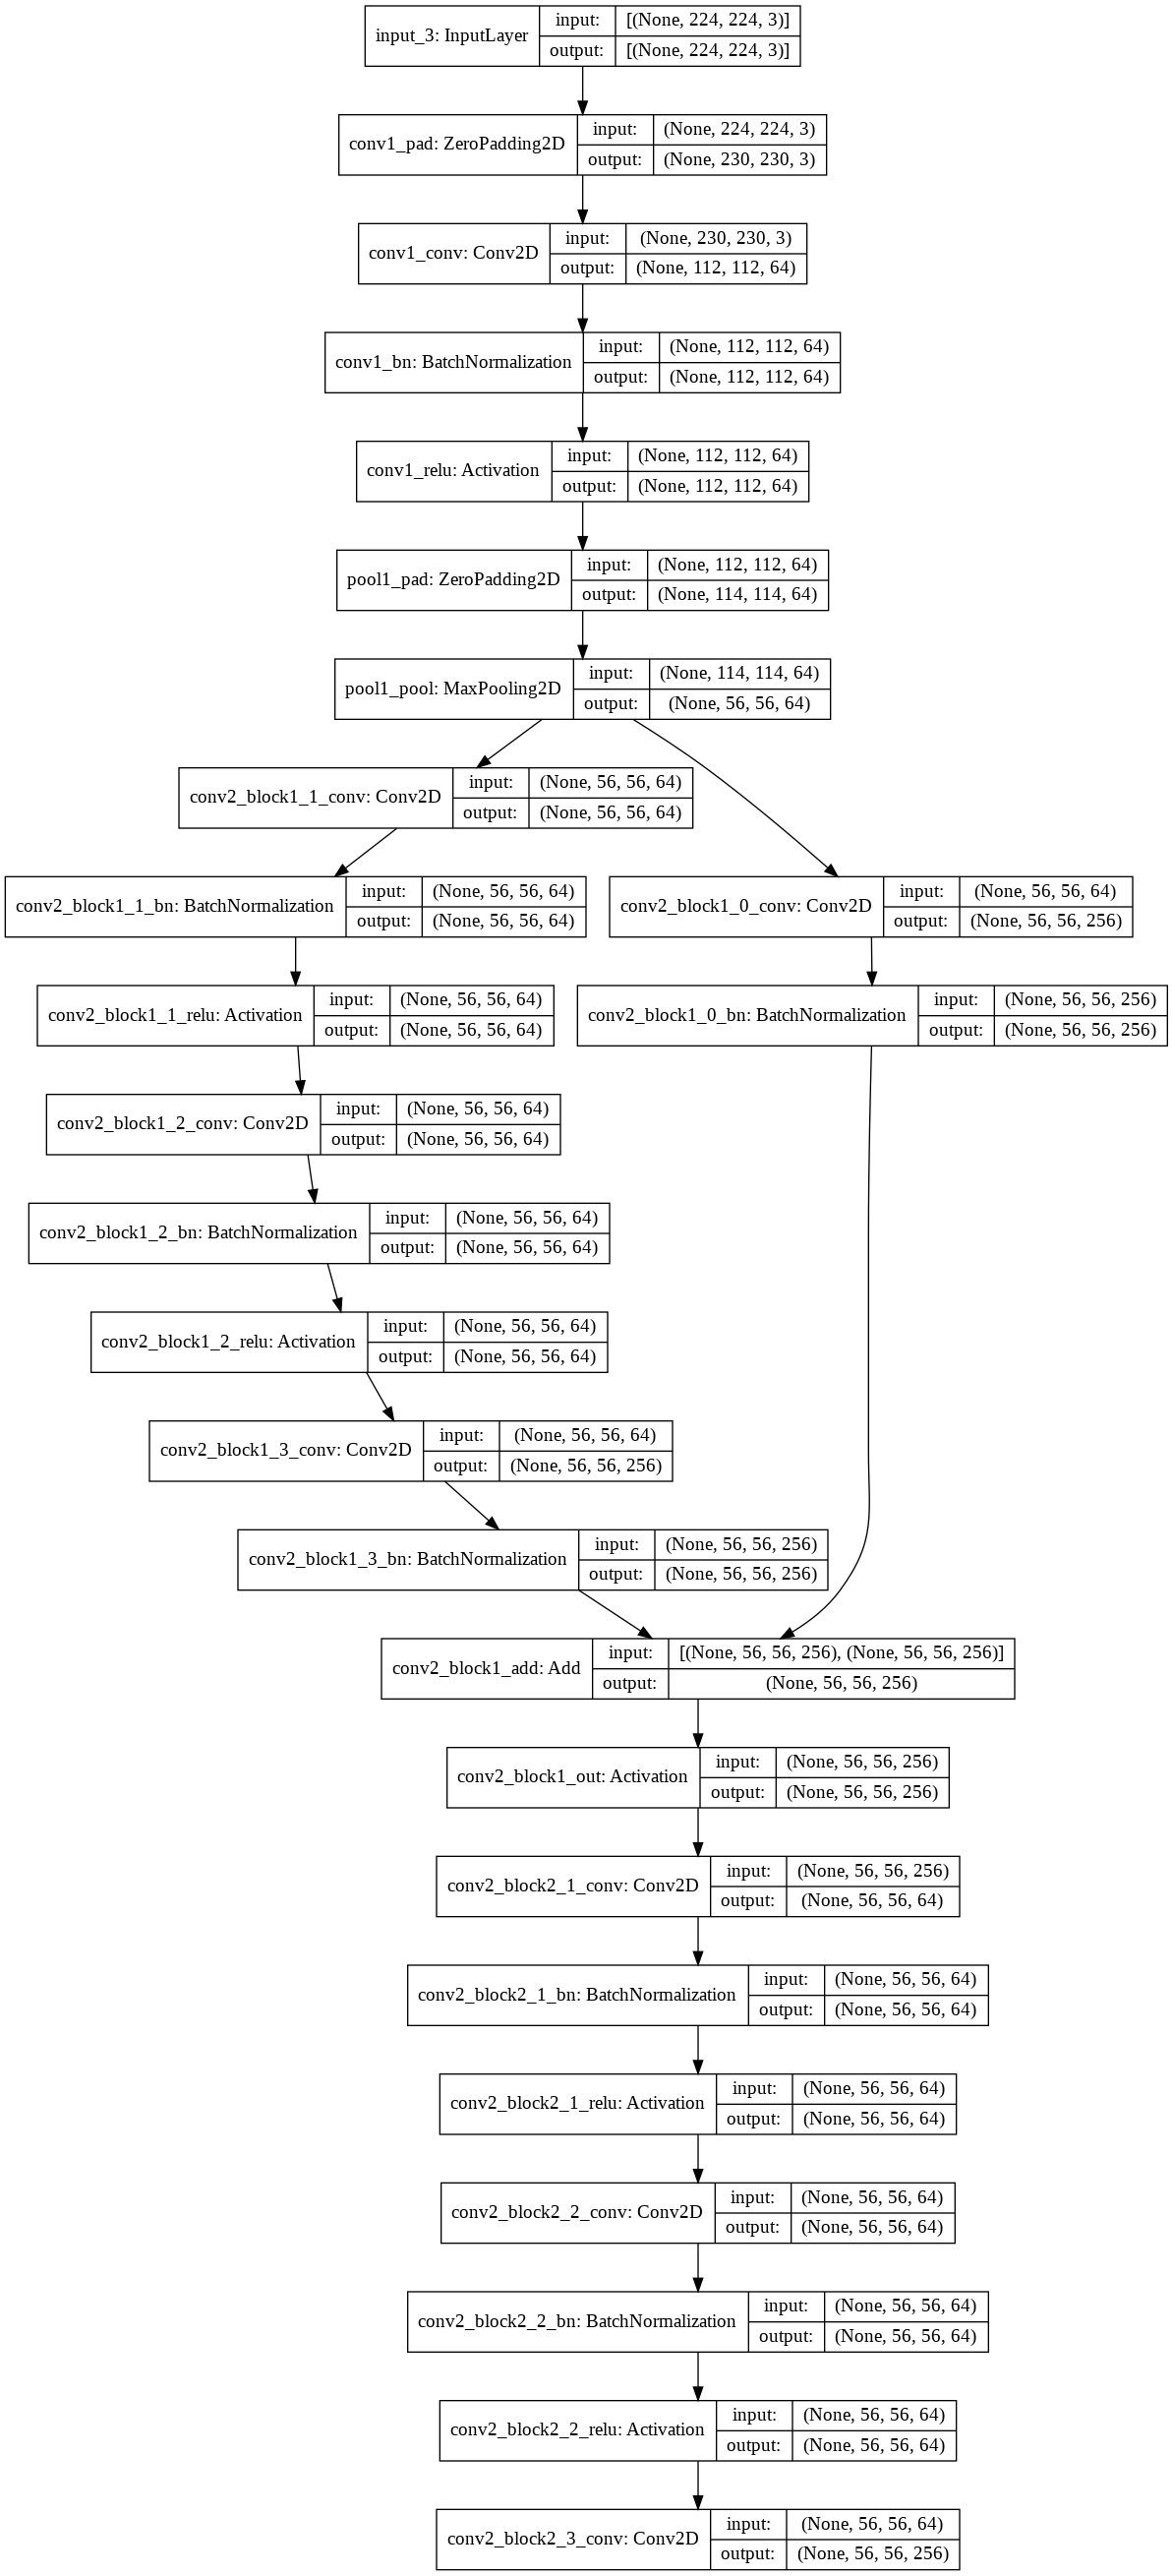

In [ ]:
tf.keras.utils.plot_model(subModel, show_shapes=True)

In [ ]:
baseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# headModel = baseModel.output
inp = tf.keras.Input(shape=(224, 224, 3))
headModel = tf.keras.applications.resnet50.preprocess_input(inp)
headModel = baseModel(headModel, training=False)
headModel = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(headModel)#Can also use GlobalAvgPool2D. No need for Flatten layer then.
headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
headModel = tf.keras.layers.Dense(256, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1)(headModel)

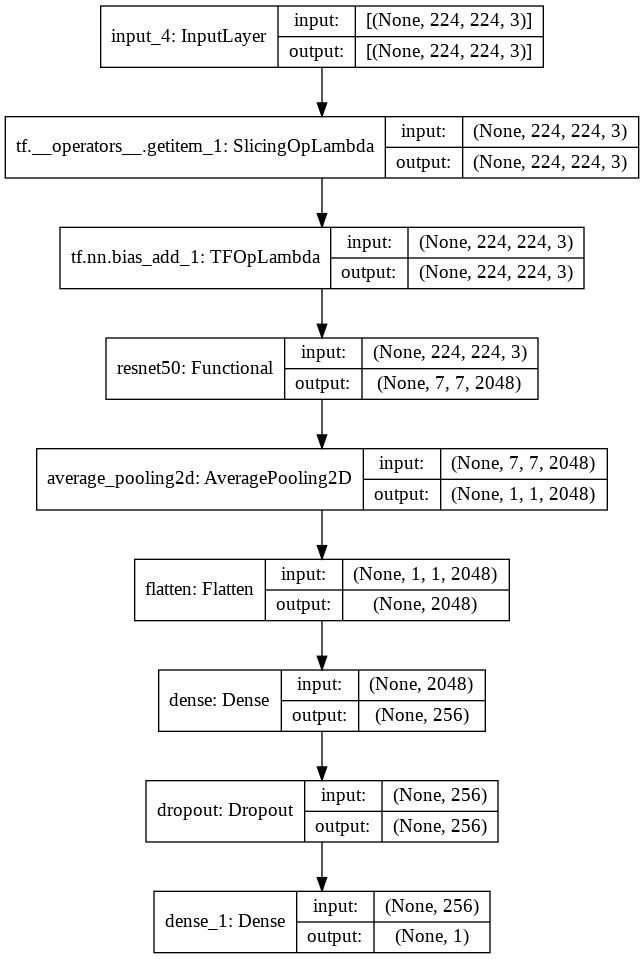

In [ ]:
# model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)
model = tf.keras.Model(inputs=inp, outputs=headModel)
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
for layer in baseModel.layers:
  layer.trainable=False             #Also baseModel.trainable=False

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
tfds.disable_progress_bar()
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True, 
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete6OD3Q7/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
size = (224, 224)

In [ ]:
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
BATCH_SIZE = 32
train_ds = train_ds.cache().batch(BATCH_SIZE).prefetch(buffer_size = 10)
validation_ds = validation_ds.cache().batch(BATCH_SIZE).prefetch(buffer_size = 10)
test_ds = test_ds.cache().batch(BATCH_SIZE).prefetch(buffer_size = 10)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - ETA: 0s - loss: 0.1200 - binary_accuracy: 0.9570

KeyboardInterrupt: ignored